<a href="https://colab.research.google.com/github/Misha0714/portfolio/blob/main/Clothing_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import random
import tensorflow as tf
from tensorflow import keras

Set random seed to 2023, for reproducibility of results.

In [2]:
#ensures you get the same results everytime you run
tf.random.set_seed(2023)

Load the datasets

In [3]:
fashion = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion.load_data()

4422102/4422102 [==============================] - 0s 0us/step


 Separate the dataset into feature set and target variable. Also separate the train and test partitions.

In [23]:
X_train = train_images
y_train = train_labels
X_test = test_images
y_test = test_labels


Print the shapes of the train and test sets for the features and target.

In [24]:
print("Train features shape:", X_train.shape)
print("Train labels shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Train features shape: (60000, 28, 28)
Train labels shape: (60000,)
Test features shape: (10000, 28, 28)
Test labels shape: (10000,)


Target variable values clothing or numbers?
** The values are numbers **

Map numbers to clothing. Data dictionary

In [25]:
clothesDict = {0:'Tshirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress',4:'Coat', 5:'Sandal',6:'Shirt', 7:'Sneaker',8:'Bag', 9:'Ankle boot'}

Show a histogram (count) of the apparel.

<ipython-input-26-33e49830750d>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  hist.set_xticklabels(clothesDict.values(), rotation = 45)


[Text(0, 0, 'Tshirt/top'),
 Text(1, 0, 'Trouser'),
 Text(2, 0, 'Pullover'),
 Text(3, 0, 'Dress'),
 Text(4, 0, 'Coat'),
 Text(5, 0, 'Sandal'),
 Text(6, 0, 'Shirt'),
 Text(7, 0, 'Sneaker'),
 Text(8, 0, 'Bag'),
 Text(9, 0, 'Ankle boot')]

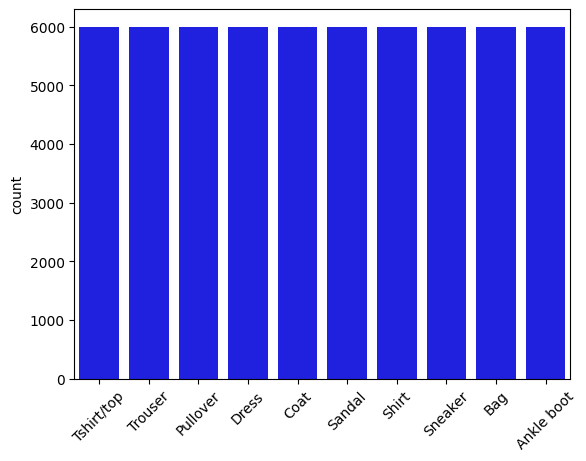

In [26]:
hist = sb.countplot(x = y_train)
hist.set_xticklabels(clothesDict.values(), rotation = 45)

Display 25 random apparel from the train dataset with labels

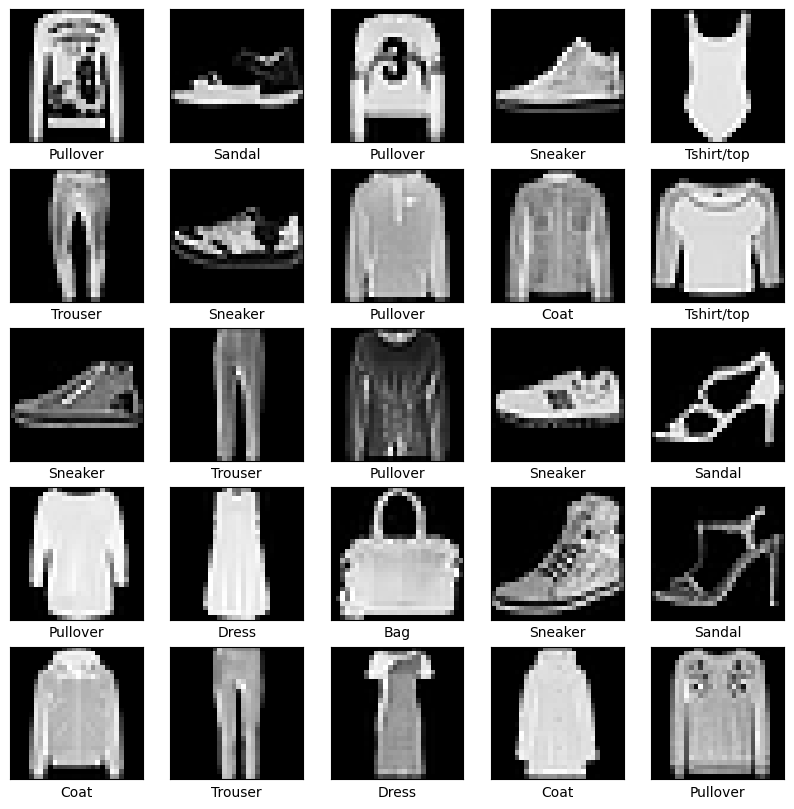

In [27]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    rand_index = np.random.randint(0, len(X_train))
    plt.imshow(X_train[rand_index], cmap=plt.cm.gray)
    plt.xlabel(clothesDict[y_train[rand_index]])

Scale the train and test features.

In [28]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Create a keras model of sequence of layers.

Flatten layer and two dense layers.
      
 Experiment with number of neurons and activation functions.

In [41]:
#adding and flattening a layer
model = keras.models.Sequential()

model.add(keras.Input(shape = (784,)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(50, activation = 'relu'))
model.add(keras.layers.Dense(10, activation='softmax'))



Display the model summary

In [42]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 dense_14 (Dense)            (None, 10)                510       
                                                                 
Total params: 84060 (328.36 KB)
Trainable params: 84060 (328.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Set the model loss function as sparse_categorical_crossentropy. Set the optimizer as sgd. Set the metrics as accuracy

In [43]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Fit to train the model. Use at least 25 epochs.


In [45]:
X_train = X_train.reshape(60000, 784)
history = model.fit(X_train, y_train, epochs=25, verbose = True)

Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4951 - accuracy: 0.8278
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4499 - accuracy: 0.8418
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4250 - accuracy: 0.8508
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4054 - accuracy: 0.8567
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3904 - accuracy: 0.8615
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3783 - accuracy: 0.8667
Epoch 7/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3671 - accuracy: 0.8700
Epoch 8/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3578 - accuracy: 0.8741
Epoch 9/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3504 - accuracy: 0.8759
Epoch 10/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.342

Plot the loss curve

<Axes: >

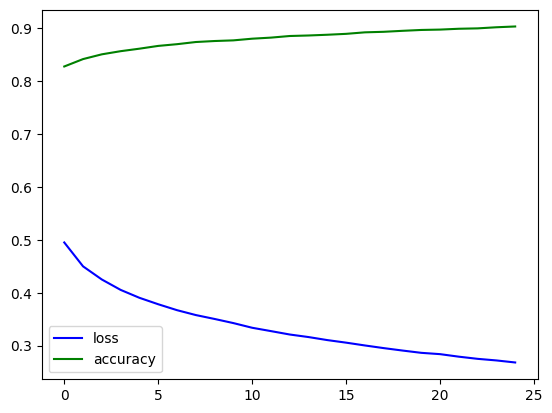

In [46]:
pd.DataFrame(history.history).plot()

Display the accuracy of your model

In [48]:
X_test = X_test.reshape(10000, 784)
loss, accuracy = model.evaluate(X_test, y_test, verbose = True)
print("Accuracy:", accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.3483 - accuracy: 0.8746
Accuracy: 0.8745999932289124


 Now, display the predicted apparel of the first row in the test dataset. Also display the actual apparel. Show both actual and predicted letters (as title) on the image of the apparel.

313/313 [==============================] - 1s 2ms/step


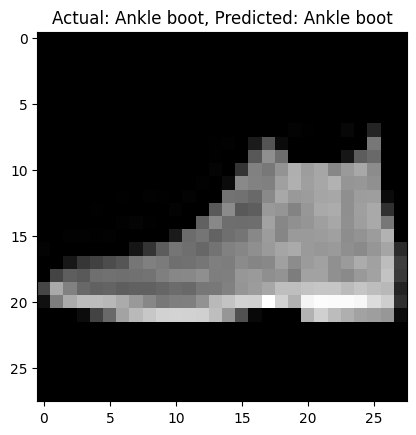

In [49]:
predictions = model.predict(X_test)
first_test_image = X_test[0].reshape((28, 28))
plt.imshow(first_test_image, cmap=plt.cm.gray)
plt.title(f"Actual: {clothesDict[y_test[0]]}, Predicted: {clothesDict[np.argmax(predictions[0])]}")
plt.show()

Finally, display the actual and predicted label of a misclassified apparel.

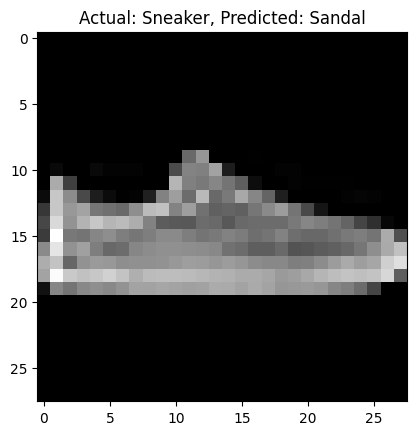

In [50]:
misclassified_indices = np.where(np.argmax(predictions, axis=1) != y_test)[0]
misclassified_index = misclassified_indices[0]

misclassified_image = X_test[misclassified_index].reshape((28, 28))
plt.imshow(misclassified_image, cmap=plt.cm.gray)
plt.title(f"Actual: {clothesDict[y_test[misclassified_index]]}, Predicted: {clothesDict[np.argmax(predictions[misclassified_index])]}")
plt.show()